In [11]:
import torch.optim as optim
from pytorch_model_summary import summary


In [12]:
# Import functions get_digits_loaders, get_mnist_loaders, get_labels 
%run Datasets.ipynb

# Import baseline RNN, reservoir RNN
%run Networks.ipynb

# Import the training and evaluation functions + their corresponding auxiliary functions. 
%run Operations.ipynb

# Import the evolutionary algorithm
%run EA.ipynb

In [13]:
# Define parameters
input_size_digits = 64  # 8 * 8 pixels
input_size_mnist = 784  # 28 * 28 pixels

# for reservoir
reservoir_size = 128

# for baseline
n_hidden = 128

n_labels = 10
lr_SGD = 0.0001
momentum_SGD = 0.9
backprop_epochs = 5 # with backprop, only applicable in the evolutionairy approach. 
max_loss_iter = 10
batch_size= 50
T = 5

population_size = 25
generations = 100  # epochs without backprop
mutate_opt = 'diff_mutation'
select_opt = 'accuracy'

# Run all models for same amount of time, but make a distinction in epochs for the evolutionairy approach .
n_epochs = backprop_epochs + generations

# Loss function constant over all experiments
loss_function = nn.NLLLoss(reduction='sum') 

train_loader_digits, val_loader_digits, test_loader_digits = get_digits_loaders(batch_size=50)
LABELS = get_labels()

In [14]:
bl_model_digits = Baseline_RNN(input_size_digits, n_hidden, n_labels, T, dataset = 'Digits')
optimizer_digits = optim.SGD([p for p in bl_model_digits.parameters() if p.requires_grad == True], lr=lr_SGD, momentum=momentum_SGD)
loss_function = nn.NLLLoss(reduction='sum') # Mean is also possible.

trained_bl_digits = training(bl_model_digits, train_loader_digits, val_loader_digits, n_epochs, optimizer_digits, loss_function, max_loss_iter)

Training started for 105 epochs.
Epoch: 0 - Loss of: 0.3424240343911307 - Accuracy of: 87.14286041259766
Epoch: 1 - Loss of: 0.22781489508492606 - Accuracy of: 93.71428680419922
Epoch: 2 - Loss of: 0.14693302086421423 - Accuracy of: 95.71428680419922
Epoch: 3 - Loss of: 0.18715096746172225 - Accuracy of: 94.57142639160156
Epoch: 4 - Loss of: 0.15098931857517786 - Accuracy of: 96.0
Epoch: 5 - Loss of: 0.17237778323037284 - Accuracy of: 96.57142639160156
Epoch: 6 - Loss of: 0.17551440988268172 - Accuracy of: 95.14286041259766
Epoch: 7 - Loss of: 0.15773563827787127 - Accuracy of: 96.0
Epoch: 8 - Loss of: 0.14540236745561871 - Accuracy of: 96.0
Epoch: 9 - Loss of: 0.17303629773003715 - Accuracy of: 94.85713958740234
Epoch: 10 - Loss of: 0.1493981603213719 - Accuracy of: 96.28571319580078
Epoch: 11 - Loss of: 0.16761085782732282 - Accuracy of: 95.42857360839844
Epoch: 12 - Loss of: 0.16739247458321707 - Accuracy of: 94.85713958740234
Epoch: 13 - Loss of: 0.1530450735773359 - Accuracy of: 9

In [15]:
# Initialize population - train by backprop for a few epochs. 
reservoir_set_digits = []
ea = EA(population_size, val_loader_digits, loss_function, input_size_digits, reservoir_size, n_labels)

for i in range(population_size):
    res_evo_digits = Reservoir_RNN(input_size_digits, reservoir_size, n_labels, T, dataset = 'Digits')
    optimizer_evo_digits = optim.SGD([p for p in res_evo_digits.parameters() if p.requires_grad == True], lr=lr_SGD, momentum=momentum_SGD)
    trained_evo_digits = training(res_evo_digits, train_loader_digits, val_loader_digits, backprop_epochs, optimizer_evo_digits, loss_function, max_loss_iter)
    reservoir_set_digits.append(trained_evo_digits)
        
# Initialize the population
new_pop = reservoir_set_digits

# Perform ea steps
for i in range(generations):
    new_pop = ea.step(new_pop, mutate_opt, select_opt)

# Sort population after x amount of generations, based on accuracy or loss performance
if select_opt == 'accuracy':
    best_pop_digits = sorted(new_pop, key=lambda k: k['accuracy_results'][-1] , reverse=True) 
elif select_opt == 'loss':
    best_pop_digits = sorted(new_pop, key=lambda k: k['loss_results'][-1] , reverse=False)


Training started for 5 epochs.
Epoch: 0 - Loss of: 2.2548067147391184 - Accuracy of: 30.571428298950195
Epoch: 1 - Loss of: 2.179606388636998 - Accuracy of: 60.0
Epoch: 2 - Loss of: 2.104936370849609 - Accuracy of: 79.14286041259766
Epoch: 3 - Loss of: 2.034027600969587 - Accuracy of: 85.14286041259766
Epoch: 4 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.2623736572265627 - Accuracy of: 56.0
Epoch: 1 - Loss of: 2.197752511160714 - Accuracy of: 80.85713958740234
Epoch: 2 - Loss of: 2.1339922659737725 - Accuracy of: 85.71428680419922
Epoch: 3 - Loss of: 2.0725491986955915 - Accuracy of: 84.57142639160156
Epoch: 4 - Loss of: 2.0130241394042967 - Accuracy of: 87.71428680419922
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.244749581473214 - Accuracy of: 46.57143020629883
Epoch: 1 - Loss of: 2.153905835832868 - Accuracy of: 77.71428680419922
Epoch: 2 - Loss of: 2.066013968331473 - Accuracy of: 78.57142639160156
Epoch: 3 - Loss o

Epoch: 4 - Loss of: 2.0038548932756695 - Accuracy of: 70.85713958740234
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.2518441772460935 - Accuracy of: 39.42856979370117
Epoch: 1 - Loss of: 2.1725212969098773 - Accuracy of: 63.71428680419922
Epoch: 2 - Loss of: 2.0929432896205356 - Accuracy of: 77.14286041259766
Epoch: 3 - Loss of: 2.016944100516183 - Accuracy of: 78.57142639160156
Epoch: 4 - Loss of: 1.9450192478724888 - Accuracy of: 80.85713958740234
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.2558416094098774 - Accuracy of: 34.57143020629883
Epoch: 1 - Loss of: 2.185712607247489 - Accuracy of: 57.71428680419922
Epoch: 2 - Loss of: 2.117067565917969 - Accuracy of: 78.0
Epoch: 3 - Loss of: 2.0505120849609373 - Accuracy of: 75.42857360839844
Epoch: 4 - Loss of: 1.9869610813685825 - Accuracy of: 80.0
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.248801531110491 - Accuracy of: 53.14285659790039
Epoch: 1 - Loss of: 2.167396458217076 - Accuracy of: 80.28571319580078
Ep

Epoch: 9 - Loss of: 2.1423890468052456 - Accuracy of: 24.85714340209961
Epoch: 9 - Loss of: 2.1247520664760047 - Accuracy of: 19.14285659790039
Epoch: 9 - Loss of: 2.2338423592703682 - Accuracy of: 23.714284896850586
Epoch: 9 - Loss of: 2.0251368495396207 - Accuracy of: 35.71428680419922
Epoch: 9 - Loss of: 2.0713621520996095 - Accuracy of: 33.14285659790039
Epoch: 9 - Loss of: 2.0699871826171874 - Accuracy of: 44.0
Epoch: 9 - Loss of: 2.1521072387695312 - Accuracy of: 19.714284896850586
Epoch: 9 - Loss of: 2.1835763113839284 - Accuracy of: 18.0
Epoch: 9 - Loss of: 2.1547574724469865 - Accuracy of: 20.85714340209961
Epoch: 9 - Loss of: 2.0414765058244977 - Accuracy of: 33.71428680419922
Epoch: 9 - Loss of: 2.1464363970075335 - Accuracy of: 17.428571701049805
Epoch: 9 - Loss of: 2.0543805149623324 - Accuracy of: 40.28571319580078
Epoch: 9 - Loss of: 2.106146480015346 - Accuracy of: 41.71428680419922
Epoch: 9 - Loss of: 2.0871396963936943 - Accuracy of: 22.0
Epoch: 9 - Loss of: 2.4930838

Epoch: 13 - Loss of: 2.0789082990373884 - Accuracy of: 33.71428680419922
Epoch: 13 - Loss of: 2.1122917829241072 - Accuracy of: 18.85714340209961
Epoch: 13 - Loss of: 3.4228024291992187 - Accuracy of: 12.571428298950195
Epoch: 13 - Loss of: 1.0452801731654575 - Accuracy of: 74.57142639160156
Epoch: 13 - Loss of: 2.1120621381487164 - Accuracy of: 14.857142448425293
Epoch: 13 - Loss of: 1.9918739318847656 - Accuracy of: 31.14285659790039
Epoch: 13 - Loss of: 0.9363067517961775 - Accuracy of: 75.71428680419922
Epoch: 13 - Loss of: 2.126026458740234 - Accuracy of: 18.85714340209961
Epoch: 13 - Loss of: 2.0272638157435825 - Accuracy of: 43.42856979370117
Mutation
Epoch: 14 - Loss of: 2.099612056187221 - Accuracy of: 35.14285659790039
Epoch: 14 - Loss of: 1.5488097708565849 - Accuracy of: 59.42856979370117
Epoch: 14 - Loss of: 2.9471945190429687 - Accuracy of: 11.714285850524902
Epoch: 14 - Loss of: 2.464539228166853 - Accuracy of: 19.14285659790039
Epoch: 14 - Loss of: 2.1002383422851563 - 

Epoch: 18 - Loss of: 4.430096827915737 - Accuracy of: 22.285715103149414
Epoch: 18 - Loss of: 2.116197030203683 - Accuracy of: 19.428571701049805
Epoch: 18 - Loss of: 2.135528869628906 - Accuracy of: 20.571428298950195
Epoch: 18 - Loss of: 10.344612165178571 - Accuracy of: 9.142857551574707
Epoch: 18 - Loss of: 2.552713165283203 - Accuracy of: 36.0
Epoch: 18 - Loss of: 7.458192138671875 - Accuracy of: 13.714285850524902
Epoch: 18 - Loss of: 6.900944039481026 - Accuracy of: 2.5714285373687744
Epoch: 18 - Loss of: 2.731510227748326 - Accuracy of: 16.571428298950195
Epoch: 18 - Loss of: 2.0199469430106025 - Accuracy of: 34.57143020629883
Epoch: 18 - Loss of: 2.3298245893205913 - Accuracy of: 9.714285850524902
Epoch: 18 - Loss of: 1.590084228515625 - Accuracy of: 66.28571319580078
Epoch: 18 - Loss of: 1.9986036028180802 - Accuracy of: 35.42856979370117
Epoch: 18 - Loss of: 0.8908369772774832 - Accuracy of: 76.57142639160156
Epoch: 18 - Loss of: 2.06621095929827 - Accuracy of: 34.8571434020

Epoch: 22 - Loss of: 5.304658464704241 - Accuracy of: 5.4285712242126465
Epoch: 22 - Loss of: 2.0334049769810267 - Accuracy of: 38.0
Epoch: 22 - Loss of: 1.4223442949567522 - Accuracy of: 65.14286041259766
Mutation
Epoch: 23 - Loss of: 2.123409685407366 - Accuracy of: 28.0
Epoch: 23 - Loss of: 5.864924142020089 - Accuracy of: 9.142857551574707
Epoch: 23 - Loss of: 6.879691074916295 - Accuracy of: 10.0
Epoch: 23 - Loss of: 2.4851603480747766 - Accuracy of: 1.4285714626312256
Epoch: 23 - Loss of: 9.559874703543526 - Accuracy of: 6.285714149475098
Epoch: 23 - Loss of: 4.0535726056780135 - Accuracy of: 34.28571319580078
Epoch: 23 - Loss of: 2.0566644069126676 - Accuracy of: 40.28571319580078
Epoch: 23 - Loss of: 6.846259765625 - Accuracy of: 16.285715103149414
Epoch: 23 - Loss of: 0.8606948961530413 - Accuracy of: 79.14286041259766
Epoch: 23 - Loss of: 2.685707048688616 - Accuracy of: 4.0
Epoch: 23 - Loss of: 0.8996384538922991 - Accuracy of: 80.28571319580078
Epoch: 23 - Loss of: 3.956224

Epoch: 27 - Loss of: 7.12377197265625 - Accuracy of: 8.285714149475098
Epoch: 27 - Loss of: 5.0228162928989954 - Accuracy of: 3.7142856121063232
Epoch: 27 - Loss of: 1.5107590048653738 - Accuracy of: 50.28571319580078
Epoch: 27 - Loss of: 4.720073067801339 - Accuracy of: 7.4285712242126465
Epoch: 27 - Loss of: 2.1343014526367186 - Accuracy of: 20.571428298950195
Epoch: 27 - Loss of: 1.9814630562918527 - Accuracy of: 17.714284896850586
Epoch: 27 - Loss of: 1.5224474443708147 - Accuracy of: 73.14286041259766
Epoch: 27 - Loss of: 10.744686715262278 - Accuracy of: 11.142857551574707
Epoch: 27 - Loss of: 2.2272222900390624 - Accuracy of: 24.571428298950195
Epoch: 27 - Loss of: 4.396936209542411 - Accuracy of: 11.428571701049805
Epoch: 27 - Loss of: 1.0819092123849052 - Accuracy of: 79.42857360839844
Epoch: 27 - Loss of: 5.304658464704241 - Accuracy of: 5.4285712242126465
Mutation
Epoch: 28 - Loss of: 5.147020481654576 - Accuracy of: 8.571428298950195
Epoch: 28 - Loss of: 1.480606188092913 -

Epoch: 32 - Loss of: 2.3482986886160715 - Accuracy of: 15.428571701049805
Epoch: 32 - Loss of: 17.30638654436384 - Accuracy of: 10.571428298950195
Epoch: 32 - Loss of: 3.9501851545061384 - Accuracy of: 10.571428298950195
Epoch: 32 - Loss of: 2.065296674455915 - Accuracy of: 28.571428298950195
Epoch: 32 - Loss of: 0.7224698638916016 - Accuracy of: 83.42857360839844
Epoch: 32 - Loss of: 3.8874725341796874 - Accuracy of: 0.0
Epoch: 32 - Loss of: 9.02794407435826 - Accuracy of: 17.714284896850586
Epoch: 32 - Loss of: 21.747309221540178 - Accuracy of: 18.85714340209961
Epoch: 32 - Loss of: 12.879374825613839 - Accuracy of: 4.857142925262451
Epoch: 32 - Loss of: 2.1820123508998326 - Accuracy of: 27.714284896850586
Epoch: 32 - Loss of: 2.5200938415527343 - Accuracy of: 0.2857142984867096
Epoch: 32 - Loss of: 0.6808757073538644 - Accuracy of: 80.28571319580078
Epoch: 32 - Loss of: 0.7397924205235072 - Accuracy of: 80.0
Epoch: 32 - Loss of: 0.901797594342913 - Accuracy of: 79.42857360839844
Epo

Epoch: 36 - Loss of: 0.9285292489188058 - Accuracy of: 77.42857360839844
Epoch: 36 - Loss of: 0.9986524527413504 - Accuracy of: 65.71428680419922
Epoch: 36 - Loss of: 6.481567731584821 - Accuracy of: 6.857142925262451
Epoch: 36 - Loss of: 5.018644278390067 - Accuracy of: 7.714285850524902
Epoch: 36 - Loss of: 5.652496381487166 - Accuracy of: 3.142857074737549
Mutation
Epoch: 37 - Loss of: 9.25890407017299 - Accuracy of: 19.714284896850586
Epoch: 37 - Loss of: 5.244242553710937 - Accuracy of: 0.0
Epoch: 37 - Loss of: 2.102232448032924 - Accuracy of: 27.428571701049805
Epoch: 37 - Loss of: 6.270444946289063 - Accuracy of: 9.428571701049805
Epoch: 37 - Loss of: 6.603047921316964 - Accuracy of: 14.571428298950195
Epoch: 37 - Loss of: 2.28954833984375 - Accuracy of: 14.571428298950195
Epoch: 37 - Loss of: 2.400603245326451 - Accuracy of: 10.571428298950195
Epoch: 37 - Loss of: 7.550318254743304 - Accuracy of: 0.2857142984867096
Epoch: 37 - Loss of: 0.8237229919433594 - Accuracy of: 85.14286

Epoch: 41 - Loss of: 0.9895485142299107 - Accuracy of: 68.57142639160156
Epoch: 41 - Loss of: 4.533935328892299 - Accuracy of: 19.14285659790039
Epoch: 41 - Loss of: 6.416369367327009 - Accuracy of: 0.0
Epoch: 41 - Loss of: 11.935280412946428 - Accuracy of: 3.4285714626312256
Epoch: 41 - Loss of: 6.455055193219866 - Accuracy of: 11.714285850524902
Epoch: 41 - Loss of: 10.004028930664063 - Accuracy of: 9.714285850524902
Epoch: 41 - Loss of: 3.739391871861049 - Accuracy of: 0.0
Epoch: 41 - Loss of: 0.8393478611537388 - Accuracy of: 76.28571319580078
Epoch: 41 - Loss of: 6.637750156947544 - Accuracy of: 1.4285714626312256
Epoch: 41 - Loss of: 5.0334058925083704 - Accuracy of: 4.285714149475098
Epoch: 41 - Loss of: 7.675693882533482 - Accuracy of: 6.285714149475098
Epoch: 41 - Loss of: 59.036693638392855 - Accuracy of: 13.142857551574707
Epoch: 41 - Loss of: 6.651405029296875 - Accuracy of: 14.571428298950195
Epoch: 41 - Loss of: 0.8005018724714007 - Accuracy of: 88.28571319580078
Epoch: 4

Epoch: 45 - Loss of: 3.7695156424386163 - Accuracy of: 17.428571701049805
Mutation
Epoch: 46 - Loss of: 2.3122078377859934 - Accuracy of: 15.714285850524902
Epoch: 46 - Loss of: 2.074745853969029 - Accuracy of: 25.14285659790039
Epoch: 46 - Loss of: 4.797935921805245 - Accuracy of: 0.2857142984867096
Epoch: 46 - Loss of: 0.8423499952043806 - Accuracy of: 83.14286041259766
Epoch: 46 - Loss of: 5.701397399902344 - Accuracy of: 9.714285850524902
Epoch: 46 - Loss of: 3.3879923793247766 - Accuracy of: 0.0
Epoch: 46 - Loss of: 3.912181004115513 - Accuracy of: 11.428571701049805
Epoch: 46 - Loss of: 3.437596435546875 - Accuracy of: 3.7142856121063232
Epoch: 46 - Loss of: 4.356644330705915 - Accuracy of: 8.571428298950195
Epoch: 46 - Loss of: 0.7671145466395787 - Accuracy of: 78.57142639160156
Epoch: 46 - Loss of: 1.8974824741908483 - Accuracy of: 50.85714340209961
Epoch: 46 - Loss of: 1.2915005384172713 - Accuracy of: 58.57143020629883
Epoch: 46 - Loss of: 10.256391863141742 - Accuracy of: 9.

Epoch: 50 - Loss of: 4.39762956891741 - Accuracy of: 9.428571701049805
Epoch: 50 - Loss of: 2.9244674246651785 - Accuracy of: 0.5714285969734192
Epoch: 50 - Loss of: 0.9605495888846262 - Accuracy of: 74.85713958740234
Epoch: 50 - Loss of: 1.105632128034319 - Accuracy of: 64.28571319580078
Epoch: 50 - Loss of: 3.0854801286969864 - Accuracy of: 15.428571701049805
Epoch: 50 - Loss of: 2.315838121686663 - Accuracy of: 37.42856979370117
Epoch: 50 - Loss of: 9.862160382952009 - Accuracy of: 19.428571701049805
Epoch: 50 - Loss of: 14.511692417689732 - Accuracy of: 22.285715103149414
Epoch: 50 - Loss of: 32.37073590959822 - Accuracy of: 16.0
Mutation
Epoch: 51 - Loss of: 11.031800362723214 - Accuracy of: 6.0
Epoch: 51 - Loss of: 1.82052490234375 - Accuracy of: 41.71428680419922
Epoch: 51 - Loss of: 2.902358921595982 - Accuracy of: 0.0
Epoch: 51 - Loss of: 30.69207275390625 - Accuracy of: 16.571428298950195
Epoch: 51 - Loss of: 0.8515330069405692 - Accuracy of: 78.57142639160156
Epoch: 51 - Los

Epoch: 55 - Loss of: 2.269678649902344 - Accuracy of: 18.285715103149414
Epoch: 55 - Loss of: 7.893058733258928 - Accuracy of: 0.2857142984867096
Epoch: 55 - Loss of: 2.024117213657924 - Accuracy of: 33.42856979370117
Epoch: 55 - Loss of: 4.238913181849888 - Accuracy of: 8.285714149475098
Epoch: 55 - Loss of: 4.355360761369978 - Accuracy of: 13.714285850524902
Epoch: 55 - Loss of: 0.8478550284249442 - Accuracy of: 79.42857360839844
Epoch: 55 - Loss of: 11.392176949637276 - Accuracy of: 12.571428298950195
Epoch: 55 - Loss of: 0.809539794921875 - Accuracy of: 85.14286041259766
Epoch: 55 - Loss of: 0.8237229919433594 - Accuracy of: 85.14286041259766
Epoch: 55 - Loss of: 3.8080333600725447 - Accuracy of: 0.2857142984867096
Epoch: 55 - Loss of: 14.417356480189731 - Accuracy of: 5.142857074737549
Epoch: 55 - Loss of: 2.18901859828404 - Accuracy of: 26.571428298950195
Epoch: 55 - Loss of: 7.742110508510045 - Accuracy of: 9.714285850524902
Epoch: 55 - Loss of: 2.5540616280691966 - Accuracy of:

Epoch: 59 - Loss of: 1.9582493809291295 - Accuracy of: 21.14285659790039
Mutation
Epoch: 60 - Loss of: 1.5213169206891741 - Accuracy of: 82.28571319580078
Epoch: 60 - Loss of: 5.88725337437221 - Accuracy of: 13.142857551574707
Epoch: 60 - Loss of: 4.254889744349889 - Accuracy of: 0.0
Epoch: 60 - Loss of: 1.5483346121651786 - Accuracy of: 61.42856979370117
Epoch: 60 - Loss of: 14.639609026227678 - Accuracy of: 20.571428298950195
Epoch: 60 - Loss of: 8.148931100027902 - Accuracy of: 3.142857074737549
Epoch: 60 - Loss of: 3.909778050013951 - Accuracy of: 0.0
Epoch: 60 - Loss of: 2.1387638419015067 - Accuracy of: 20.0
Epoch: 60 - Loss of: 2.560326450892857 - Accuracy of: 1.1428571939468384
Epoch: 60 - Loss of: 5.165331726074219 - Accuracy of: 21.428571701049805
Epoch: 60 - Loss of: 1.1426134381975446 - Accuracy of: 63.14285659790039
Epoch: 60 - Loss of: 2.0605670601981028 - Accuracy of: 32.0
Epoch: 60 - Loss of: 3.71963126046317 - Accuracy of: 21.714284896850586
Epoch: 60 - Loss of: 31.949

Epoch: 64 - Loss of: 9.291942661830356 - Accuracy of: 22.0
Epoch: 64 - Loss of: 3.7155106026785716 - Accuracy of: 0.0
Epoch: 64 - Loss of: 4.594268929617746 - Accuracy of: 0.0
Epoch: 64 - Loss of: 3.0560452706473216 - Accuracy of: 4.285714149475098
Epoch: 64 - Loss of: 0.6489710072108678 - Accuracy of: 83.71428680419922
Epoch: 64 - Loss of: 0.8519444165910993 - Accuracy of: 75.14286041259766
Epoch: 64 - Loss of: 10.756185302734375 - Accuracy of: 19.714284896850586
Epoch: 64 - Loss of: 1.1921861049107143 - Accuracy of: 60.85714340209961
Mutation
Epoch: 65 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 65 - Loss of: 2.573030526297433 - Accuracy of: 3.4285714626312256
Epoch: 65 - Loss of: 18.193363211495537 - Accuracy of: 19.428571701049805
Epoch: 65 - Loss of: 7.3700112479073665 - Accuracy of: 25.714284896850586
Epoch: 65 - Loss of: 1.5483346121651786 - Accuracy of: 61.42856979370117
Epoch: 65 - Loss of: 0.8388054438999721 - Accuracy of: 79.14286041259766
Epoch: 65 - Loss of: 0.

Epoch: 69 - Loss of: 0.6782519204275949 - Accuracy of: 81.71428680419922
Epoch: 69 - Loss of: 2.6247724042619978 - Accuracy of: 15.428571701049805
Epoch: 69 - Loss of: 2.505568586077009 - Accuracy of: 0.2857142984867096
Epoch: 69 - Loss of: 1.0649202292306084 - Accuracy of: 85.14286041259766
Epoch: 69 - Loss of: 4.133252825055804 - Accuracy of: 6.5714287757873535
Epoch: 69 - Loss of: 2.075718318394252 - Accuracy of: 24.571428298950195
Epoch: 69 - Loss of: 3.43788818359375 - Accuracy of: 10.0
Epoch: 69 - Loss of: 4.777506975446428 - Accuracy of: 4.5714287757873535
Epoch: 69 - Loss of: 2.135975189208984 - Accuracy of: 26.0
Epoch: 69 - Loss of: 2.0601846749441965 - Accuracy of: 23.14285659790039
Epoch: 69 - Loss of: 2.5445891898018975 - Accuracy of: 9.714285850524902
Epoch: 69 - Loss of: 6.120498221261161 - Accuracy of: 17.14285659790039
Epoch: 69 - Loss of: 7.68277082170759 - Accuracy of: 26.571428298950195
Epoch: 69 - Loss of: 1.930334690638951 - Accuracy of: 86.0
Epoch: 69 - Loss of: 3

Epoch: 74 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 74 - Loss of: 2.678527635846819 - Accuracy of: 40.57143020629883
Epoch: 74 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 74 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 74 - Loss of: 0.8005018724714007 - Accuracy of: 88.28571319580078
Epoch: 74 - Loss of: 0.8005018724714007 - Accuracy of: 88.28571319580078
Epoch: 74 - Loss of: 0.8005018724714007 - Accuracy of: 88.28571319580078
Epoch: 74 - Loss of: 2.485160369873047 - Accuracy of: 1.4285714626312256
Epoch: 74 - Loss of: 0.8005018724714007 - Accuracy of: 88.28571319580078
Epoch: 74 - Loss of: 8.807376098632812 - Accuracy of: 26.0
Epoch: 74 - Loss of: 3.715545697893415 - Accuracy of: 0.0
Epoch: 74 - Loss of: 1.9560206604003907 - Accuracy of: 45.71428680419922
Epoch: 74 - Loss of: 8.807376098632812 - Accuracy of: 26.0
Epoch: 74 - Loss of: 0.8005018724714007 - Accuracy of: 88.28571319580078
Epoch: 74 - Loss of: 0.8005018724714007 - Accuracy of: 88.285713

Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 79 - Loss of: 2.8571592930385044 - Accuracy of: 0.0
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 79 - Loss of: 2.95713374546596 - Accuracy of: 1.4285714626312256
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 79 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epo

Epoch: 84 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 2.8571592930385044 - Accuracy of: 0.0
Epoch: 84 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 84 - Loss of: 2.95713374546596 - Accuracy of: 1.4285714626312256
Epoch: 84 - Loss of: 1.9114959280831474 - Accuracy of: 41.1428

Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 89 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Mutation
Epoch: 90 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 90 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 90 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 90 - Loss of: 1

Epoch: 94 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 94 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 94 - Loss of: 2.95713374546596 - Accuracy of: 1.4285714626312256
Epoch: 94 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 94 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 94 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 94 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Mutation
Epoch: 95 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 95 - Loss of: 0.8163908004760743 - Accuracy of: 76.0
Epoch: 95 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 95 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 95 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 95 - Loss of: 0.8163908004760743 - Accuracy of: 76.0
Epoch: 95 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 95 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 95 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch:

Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 1.41192387172154 - Accuracy of: 90.0
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 2.95713374546596 - Accuracy of: 1.4285714626312256
Epoch: 100 - Loss of: 1.9114959280831474 - Accuracy of: 41.14285659790039
Epoch: 100 - Loss of: 2.8571592930385044 - Accuracy of: 0.0
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 2.8571592930385044 - Accuracy of: 0.0
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 2.95713374546596 - Accuracy of: 1.4285714626312256
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 1.966073477608817 - Accuracy of: 90.0
Epoch: 100 - Loss of: 2.95713374546596 - Accuracy of: 1.4285714626312256
Epoch: 100 - Loss of: 1.9114959280831474 - Accur

In [16]:
# Run 1 reservoir RNN without evolutionary optimization
res_model_digits = Reservoir_RNN(input_size_digits, reservoir_size, n_labels, T, dataset = 'Digits')
optimizer_digits = optim.SGD([p for p in res_model_digits.parameters() if p.requires_grad == True], lr=lr_SGD, momentum=momentum_SGD)
trained_res_digits = training(res_model_digits, train_loader_digits, val_loader_digits, n_epochs, optimizer_digits, loss_function, max_loss_iter)

Training started for 105 epochs.
Epoch: 0 - Loss of: 2.2569084821428573 - Accuracy of: 36.85714340209961
Epoch: 1 - Loss of: 2.1865247889927457 - Accuracy of: 51.42856979370117
Epoch: 2 - Loss of: 2.1161646815708703 - Accuracy of: 68.28571319580078
Epoch: 3 - Loss of: 2.049574781145368 - Accuracy of: 72.57142639160156
Epoch: 4 - Loss of: 1.9857745361328125 - Accuracy of: 75.42857360839844
Epoch: 5 - Loss of: 1.925177219935826 - Accuracy of: 78.57142639160156
Epoch: 6 - Loss of: 1.8675790623256139 - Accuracy of: 80.0
Epoch: 7 - Loss of: 1.812648468017578 - Accuracy of: 83.14286041259766
Epoch: 8 - Loss of: 1.7602919224330358 - Accuracy of: 82.57142639160156
Epoch: 9 - Loss of: 1.7109206063406808 - Accuracy of: 84.85713958740234
Epoch: 10 - Loss of: 1.6646140834263392 - Accuracy of: 84.28571319580078
Epoch: 11 - Loss of: 1.6195316205705914 - Accuracy of: 86.0
Epoch: 12 - Loss of: 1.5771283394949778 - Accuracy of: 86.28571319580078
Epoch: 13 - Loss of: 1.5368469674246652 - Accuracy of: 85

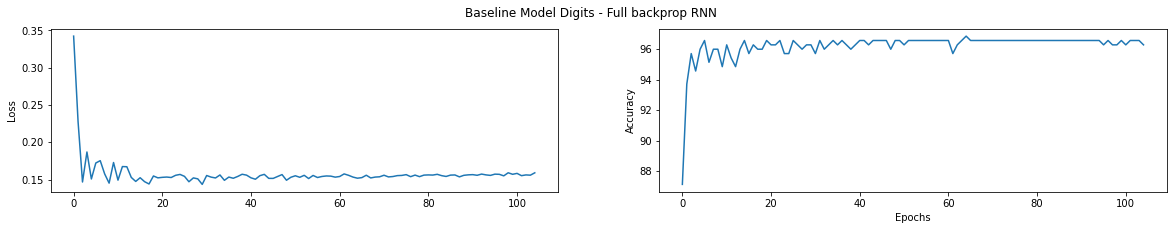

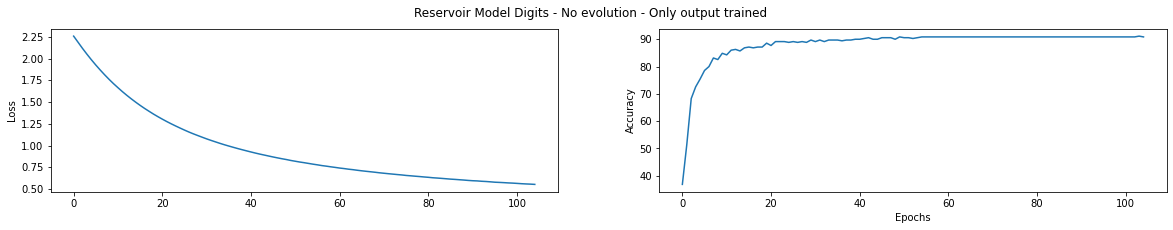

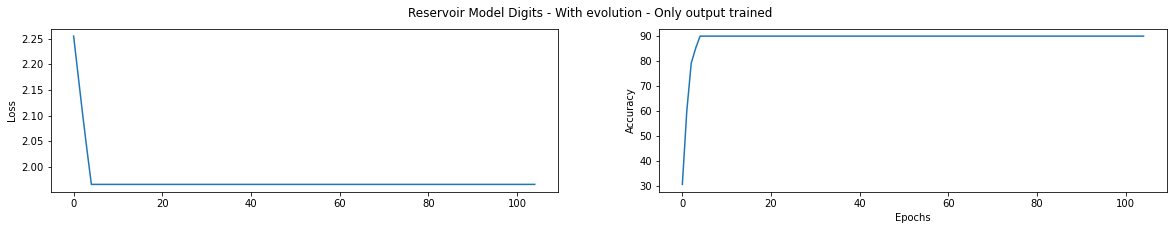

In [17]:
# Plot baseline - full backprop
plot_results(trained_bl_digits['epoch'], 
             trained_bl_digits['loss_results'], 
             trained_bl_digits['accuracy_results'],
            'Baseline Model Digits - Full backprop RNN')

# Plot reservoir - no evolution yet
plot_results(trained_res_digits['epoch'], 
             trained_res_digits['loss_results'], 
             trained_res_digits['accuracy_results'],
            'Reservoir Model Digits - No evolution - Only output trained')

# Plot reservoir - with evolution - best model
plot_results(best_pop_digits[0]['epoch'], 
             best_pop_digits[0]['loss_results'], 
             best_pop_digits[0]['accuracy_results'],
            'Reservoir Model Digits - With evolution - Only output trained')


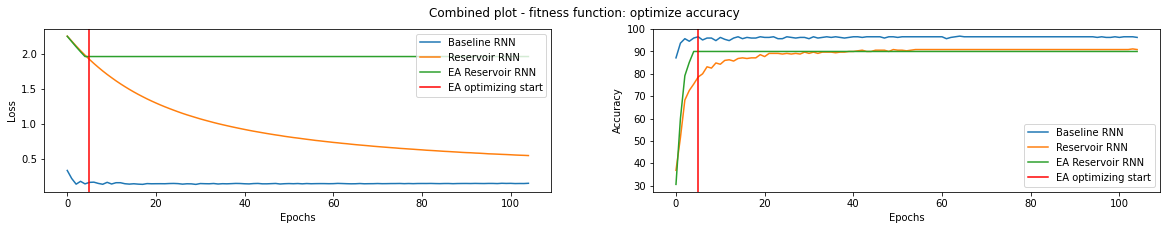

In [18]:
# Plot above plots in one plot

combined_plot_result(
            trained_bl_digits['epoch'],
            trained_bl_digits['loss_results'], 
            trained_bl_digits['accuracy_results'],
            trained_res_digits['loss_results'], 
            trained_res_digits['accuracy_results'],
            best_pop_digits[0]['loss_results'], 
            best_pop_digits[0]['accuracy_results'],
            border = backprop_epochs,
            label_bl = 'Baseline RNN',
            label_res = 'Reservoir RNN',
            label_evo = 'EA Reservoir RNN',
            title = 'Combined plot - fitness function: optimize accuracy')

In [19]:
# Overview of the models structure

# Baseline RNN model
print(summary(bl_model_digits, torch.zeros(1, 64), show_input=True, show_hierarchical=False))

# Reservoir RNN model
print(summary(res_model_digits, torch.zeros(1, 64), show_input=True, show_hierarchical=False))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Linear-1            [1, 128]          16,512          16,512
            Tanh-2            [1, 128]               0               0
          Linear-3            [1, 192]          24,704          24,704
            ReLU-4            [1, 128]               0               0
          Linear-5            [1, 192]          24,704          24,704
            ReLU-6            [1, 128]               0               0
          Linear-7            [1, 192]          24,704          24,704
            ReLU-8            [1, 128]               0               0
          Linear-9            [1, 192]          24,704          24,704
           ReLU-10            [1, 128]               0               0
         Linear-11            [1, 192]          24,704          24,704
           ReLU-12            [1, 128]               0               0
     

In [ ]:
# Load in digits data and perform training
# Takes a bit of time

#train_loader_mnist, val_loader_mnist, test_loader_mnist = get_mnist_loaders(batch_size=50)